<a href="https://colab.research.google.com/github/thiru2024/ethnicity_prediction/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model,Sequential

In [154]:
image_size = [266,266]

In [155]:
model = VGG19(input_shape = image_size+[3],include_top=False,weights='imagenet')

In [156]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 266, 266, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 266, 266, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 266, 266, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 133, 133, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 133, 133, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 133, 133, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 66, 66, 128)       0     

In [157]:
final = Model(inputs = model.input,outputs = Dense(1,activation = 'sigmoid')(Flatten()(model.output)))

In [158]:
final.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 266, 266, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 266, 266, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 266, 266, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 133, 133, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 133, 133, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 133, 133, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 66, 66, 128)       0   

In [159]:
final.compile(loss = 'binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
train = '/content/drive/My Drive/ethinicity_predictor/train'
test = '/content/drive/My Drive/ethinicity_predictor/test'

In [162]:
train_aug = ImageDataGenerator(rescale = 1./255,zoom_range=0.2,shear_range=0.3,horizontal_flip=True)
test_aug = ImageDataGenerator(rescale = 1./255)

In [163]:
final_train = train_aug.flow_from_directory(train,target_size=(266,266),batch_size=32,class_mode ='binary')

Found 413 images belonging to 2 classes.


In [164]:
final_test = test_aug.flow_from_directory(test,target_size=(266,266),batch_size=32,class_mode='binary')

Found 155 images belonging to 2 classes.


In [165]:
vgg19 = final.fit(final_train,epochs=10,validation_data = final_test)

Epoch 1/10
13/13 [==============================] - 25s 2s/step - loss: 0.8735 - accuracy: 0.5981 - val_loss: 0.7652 - val_accuracy: 0.5935
Epoch 2/10
13/13 [==============================] - 12s 892ms/step - loss: 0.4196 - accuracy: 0.8087 - val_loss: 0.5069 - val_accuracy: 0.7419
Epoch 3/10
13/13 [==============================] - 12s 913ms/step - loss: 0.3027 - accuracy: 0.8886 - val_loss: 0.5055 - val_accuracy: 0.7226
Epoch 4/10
13/13 [==============================] - 12s 902ms/step - loss: 0.2256 - accuracy: 0.9346 - val_loss: 0.4523 - val_accuracy: 0.7806
Epoch 5/10
13/13 [==============================] - 12s 898ms/step - loss: 0.1901 - accuracy: 0.9516 - val_loss: 0.4262 - val_accuracy: 0.8000
Epoch 6/10
13/13 [==============================] - 12s 915ms/step - loss: 0.1634 - accuracy: 0.9492 - val_loss: 0.4146 - val_accuracy: 0.8065
Epoch 7/10
13/13 [==============================] - 12s 893ms/step - loss: 0.1286 - accuracy: 0.9855 - val_loss: 0.4155 - val_accuracy: 0.7871
Ep

In [166]:
final.save('imagevgg19')

INFO:tensorflow:Assets written to: imagevgg19/assets


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

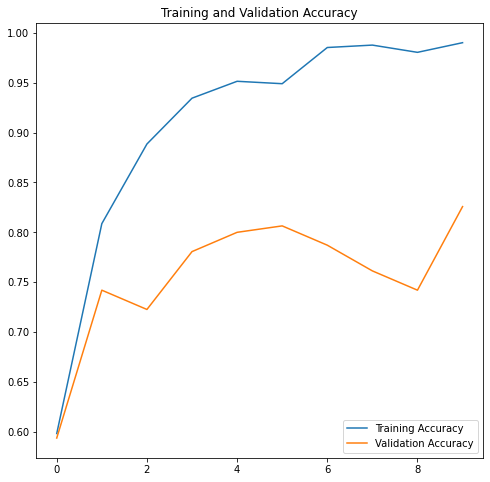

Text(0.5, 1.0, 'Training and Validation Loss')

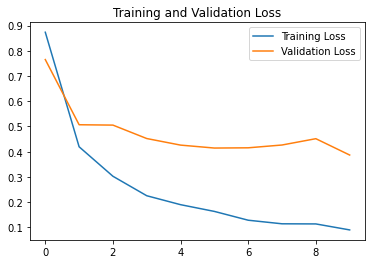

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = vgg19.history['accuracy']
val_acc = vgg19.history['val_accuracy']
loss = vgg19.history['loss']
val_loss = vgg19.history['val_loss']

epochs = range(10)
plt.figure(figsize=(8, 8))
plt.plot(epochs,acc, label='Training Accuracy')
plt.plot(epochs,val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.subplot(1, 1, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [171]:
import numpy as np
from tensorflow.keras.preprocessing import image
im = image.load_img('/content/drive/My Drive/african.jpg',target_size = (266,266))

In [172]:
image_a = image.img_to_array(im)
image_a = np.expand_dims(image_a/255,axis=0)

In [173]:
a = final.predict(image_a)
if a[0][0] >= 0.5:
  print('asian',a[0][0])
if a[0][0] < 0.5:
  print('african',-1*(a[0][0]-1))

african 0.9744899030774832
